In [1]:
# 1) Create a function that reverses a string. For example, given the string "forward", 
#    your function should return "drawrof". Assume all inputs are strings.
def reverse(str):
    rev = ''
    for i in range(len(str), 0, -1):
        rev += str[i-1]
    return(rev)

print(reverse('forward'))
print(reverse('backward'))

drawrof
drawkcab


In [2]:
# 2) Complete the function below that can be used to calculate and return the posterior 
#   probability of an event A, given the known outcome of Event B using Bayes Theorem:

# Calculates P(A | B) using bayes theorem.

# Args:
#     a: P(A)
#     b_given_a: P(B | A)
#     b_given_not_a: P(B | ~A)

# Returns:
#     P(A | B)
def bayes(a, b_given_a, b_given_not_a):
#   P(B|A) = P(B|A) * P(A) / [P(B|A) * P(A) + P(B|~A) * P(~A)]
   
    result = (b_given_a * a) / (b_given_a * a + b_given_not_a * (1 - a))
    return result

In [3]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import statistics 

%matplotlib inline

In [4]:
# 3) Analyze the teams dataset from the Lahman baseball records. This dataset contains 
#    season statistics for each Major League Baseball team.

data_url = 'https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/lahman-teams.csv'
lahmen = pd.read_csv(data_url)
lahmen.head()

,yearID,lgID,teamID,franchID,divID,Rank,G,Ghome,W,L,...,DP,FP,name,park,attendance,BPF,PPF,teamIDBR,teamIDlahman45,teamIDretro
0,1871,NaN,BS1,BNA,NaN,3,31,NaN,20,10,...,NaN,0.83,Boston Red Stockings,South End Grounds I,NaN,103,98,BOS,BS1,BS1
1,1871,NaN,CH1,CNA,NaN,2,28,NaN,19,9,...,NaN,0.82,Chicago White Stockings,Union Base-Ball Grounds,NaN,104,102,CHI,CH1,CH1
2,1871,NaN,CL1,CFC,NaN,8,29,NaN,10,19,...,NaN,0.81,Cleveland Forest Citys,National Association Grounds,NaN,96,100,CLE,CL1,CL1
3,1871,NaN,FW1,KEK,NaN,7,19,NaN,7,12,...,NaN,0.80,Fort Wayne Kekiongas,Hamilton Field,NaN,101,107,KEK,FW1,FW1
4,1871,NaN,NY2,NNA,NaN,5,33,NaN,16,17,...,NaN,0.83,New York Mutuals,Union Grounds (Brooklyn),NaN,90,88,NYU,NY2,NY2


C:\Users\Steve\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


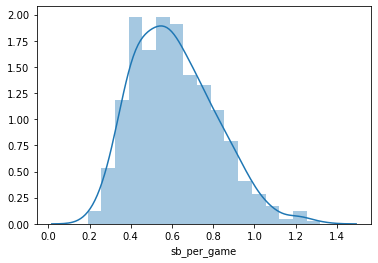

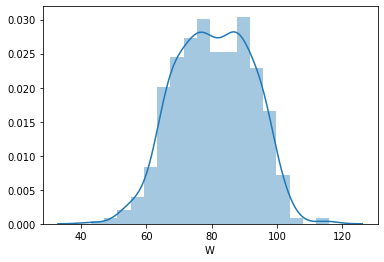

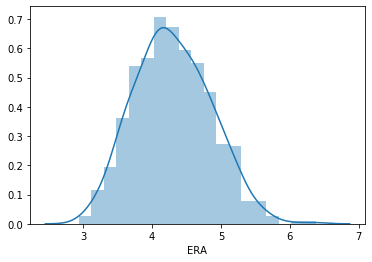

In [5]:
#   a) For all records since 1995, plot histograms for the following variables. Which 
#   distribution do they appear to follow? Consider what each variable is measuring along with the 
#   histogram's shape.

#   - Stolen bases per game
#   - Wins
#   - Earned run average

since_1995 = lahmen.loc[lahmen['yearID'] >= 1995]

since_1995['sb_per_game'] = since_1995['SB'] / since_1995['G']
sns.distplot(since_1995['sb_per_game'])
plt.show()
sns.distplot(since_1995['W'])
plt.show()
sns.distplot(since_1995['ERA'])
plt.show()

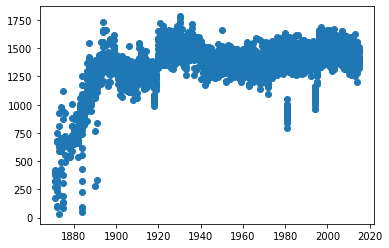

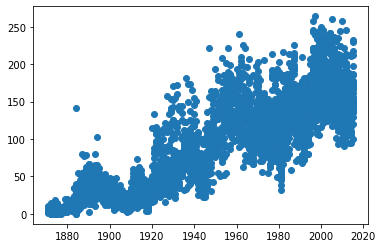

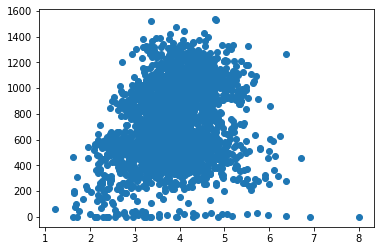

In [6]:
# b) Conduct some further exploratory data analysis on this dataset. Consider 
#   qualities like distributions, correlations and trends over time. Try to find 
#   something interesting to say about the data, and use visualizations to support your argument.

# Plot correlation between year and strike outs, year and home runs
# Plot correlation between ERA and strike outs
plt.scatter(lahmen['yearID'], lahmen['H'])
plt.show()
plt.scatter(lahmen['yearID'], lahmen['HR'])
plt.show()
plt.scatter(lahmen['ERA'], lahmen['SO'])
plt.show()

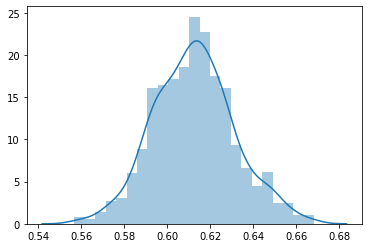

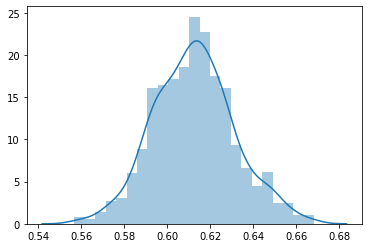

In [8]:
# 4) Choose any two of the variables from 3. Draw 1,000 samples, taking the mean of 100 observations 
#   each time. Plot the frequencies of the sample means. What distribution does this appear to 
#   follow?
#   Hint: df['col'].sample(n=50) will draw 50 random observations from df['col'].

# SB per game and W
sb_means = []
w_means = []
for _ in range(1000):
    sb_sample = since_1995['sb_per_game'].sample(n=100)
    sb_means.append(sb_sample.mean())

    w_sample = since_1995['W'].sample(n=100)
    w_means.append(sb_sample.mean())

#print(sb_means)

sns.distplot(sb_means)
plt.show()
sns.distplot(w_means)
plt.show()